## ECMM444 Fundamentals of Data Science
## Course Assessment 2


This course assessment (CA2) represents 60% of the overall module assessment.

**Submission deadline:** 8 January 2024, 12noon

**Aim:** Show understanding of linear algebra methods for data analysis with `pandas` and `numpy`.

This is an **individual exercise** and your attention is drawn to the University guidelines on collaboration and plagiarism, which are available from the university website.


**Notes on how to use the notebook:**

1. do not change the name of this notebook, i.e. the notebook file has to be: `CA2.ipynb`.
2. do not add your name or student code in the notebook or in the file name (it must be an anonymous submission).
3. do not remove or delete or add any cell in this notebook: you should work on a separate, private notebook, and only when you are finished debugging copy the function implementations into the cells of this notebook. Make sure to copy **only** the function implementation and nothing else.
4. remove the `raise NotImplementedError()` under the `# YOUR CODE HERE` and replace it with **your code**: note that if you leave this command in the cell you will fail the associated test.

**Submission:**

- to access this notebook you have downloaded the archive ecmm444_ca2.zip, and unziped it to a folder ecmm444_ca2
- the folder ecmm444_ca2 contains some images (.png), a notebook (.ipynb) and some other files for the datasets
- to submit your completed Jupyter notebook, save it in the folder ecmm444_ca2 without changing the file name, i.e. the notebook has to have the file name CA2.ipynb
- create a .zip archive (not any other compression format, only .zip) of the folder ecmm444_ca2 with your updated notebook 
- submit a single file, the zipped archive, using the ELE submission system  


**Evaluation criteria:**

Each question asks for one or more functions to be implemented. 

- Each function is awarded a number of marks. 
- Hidden unit tests will be used to evaluate if desired properties of the required function are met. 
- If you make a typo error (e.g. mispelling a variable) this will likely causes a syntax error, and the function will fail the hidden unit tests.
- The coding style (including clarity, conciseness, appropiate use of commands and data structures, efficiency, good programming practices) will also be kept into consideration to award full marks.  
- Note that functions may be tested in the unit tests on some *randomly* generated input.
- Notebooks not conforming to the required format (see notes on how to use the notebook) will be penalised.

**Notes:**

Students are expected to do some autonomous readings and research to familiarise themselves with the topics of the exercises.

Students are not allowed to import additional external libraries unless explicitly stated in the question. 

Do not assume that the implementations provided in the Workshops exercises do not contain mistakes. You should write and are ultimately responsible for the code that you submit in this assessment.

Questions are not strict software specifications. Students are expected to use their knowledge of the subject to interpret correctly the meaning of questions.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Part 1

**Aim:** Show competence in using the `numpy` library, and understanding of principal component analysis and the singular value decomposition.

**Overview of the questions:**

Questions 1.1 - 1.4 are about the construction of the dataset.

Questions 1.5 - 1.7 are about principal component analysis.

Questions 1.8 - 1.9 are about the rank `r` approximation.

## Question 1.1  [marks 5]

Create a function `create_rot_mat(A)` that takes a non-singular, square array `A` as input and outputs a rotation matrix (array) with the same shape as the input. The function should first apply the Gram-Schmidt process to the columns in `A`. Following this, the sign of the last column should be flipped if the determinant is negative. The function should raise an AssertionError if the input array is singular. The function should not change the original array `A`. 

In [10]:
import numpy as np

def create_rot_mat(A):
    # Check if A is a square matrix
    assert A.shape[0] == A.shape[1], "Input matrix must be a square matrix"

    # Check if A is non-singular
    assert np.linalg.det(A) != 0, "Input matrix must be non-singular"

    # Create a copy of A to avoid changing the original array
    Q = np.array(A, copy=True, dtype=float)

    # Apply Gram-Schmidt process to the columns of Q
    for i in range(Q.shape[1]):
        for j in range(i):
            Q[:, i] -= np.dot(Q[:, j], A[:, i]) * Q[:, j]
        # Normalize the column
        Q[:, i] /= np.linalg.norm(Q[:, i])

    # Check the determinant of the resulting matrix
    det_Q = np.linalg.det(Q)

    # If the determinant is negative, flip the sign of the last column
    if det_Q < 0:
        Q[:, -1] *= -1

    return Q

# Example usage:
A = np.array([[1, 2, 3],
              [2, 5, 6],
              [7, 8, 9]])

rot_mat = create_rot_mat(A)
print(rot_mat)


[[ 0.13608276  0.2728485  -0.95238394]
 [ 0.27216553  0.91404249  0.30075282]
 [ 0.95257934 -0.30013335  0.05012547]]


In [ ]:
## This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.2  [marks 5]

Create a function `means = create_means(R, k)` that takes as input an `n x n` rotation matrix `R` and an integer `k`. The output will be an `n x k` array containing the coordinates of `k` means (of the data to be generated later). The first column (mean coordinates) in the output array should be a unit vector with `means[0,0] = 1`. The second column should be equal to the first column multiplied from the left by the rotation matrix `R`, the third column should be equal to the first column multiplied twice from the left by the rotation matrix `R`, the fourth column should be equal to the first column multiplied thrice from the left by the rotation matrix `R`, etc. The function should raise an AssertionError if the array `R` is not a rotation matrix.

In [16]:
import numpy as np

def create_means(R, k):
    # Check if R is a rotation matrix
    assert np.allclose(np.eye(R.shape[0]), np.dot(R.T, R)), "Input matrix must be a rotation matrix"

    n = R.shape[0]

    # Initialize means array
    means = np.zeros((n, k))

    # Set the first column as a unit vector
    means[:, 0] = np.eye(n)[:, 0]

    # Fill in the rest of the columns by multiplying the first column by R
    for i in range(1, k):
        means[:, i] = np.dot(R, means[:, i-1])

    return means

# Example usage:
n = 3  # Example dimension
k = 4  # Number of means
R = np.array([[0, -1, 0],
              [1, 0,0],
              [0, 0,1]])  # Example rotation matrix

means = create_means(R, k)
print(means)


[[ 1.  0. -1.  0.]
 [ 0.  1.  0. -1.]
 [ 0.  0.  0.  0.]]


In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.3  [marks 3]

Create a function `create_PSD_matrix(R, eigenvalues)` that takes as input an `n x n` rotation matrix `R` and a `1 x n` dimensional array `eigenvalues` of positive numbers. The function should output a positive definite matrix with the eigenvectors specified by the columns in `R` and the associated eigenvalues given by the values in `eigenvalues`. The function should raise an AssertionError if the array `R` is not a rotation matrix or if any of the eigenvalues are not positive.

In [18]:
import numpy as np

def create_PSD_matrix(R, eigenvalues):
    # Check if R is a rotation matrix
    assert np.allclose(np.eye(R.shape[0]), np.dot(R.T, R)), "Input matrix must be a rotation matrix"

    # Check if eigenvalues are positive
    assert all(val > 0 for val in eigenvalues), "Eigenvalues must be positive"

    n = R.shape[0]

    # Create the positive definite matrix
    PSD_matrix = np.dot(np.dot(R, np.diag(eigenvalues)), R.T)

    return PSD_matrix

# Example usage:
n = 3  # Example dimension
R = np.array([[0, -1, 0],
              [1, 0,0],
              [0, 0,1]]) # Example rotation matrix
eigenvalues = np.array([1, 2, 3])  # Example eigenvalues

PSD_matrix = create_PSD_matrix(R, eigenvalues)
print(PSD_matrix)

[[2 0 0]
 [0 1 0]
 [0 0 3]]


In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.4  [marks 4]

Create a function `X, targets = make_data(means, cov, m)` thats output a data matrix `X` and a one dimensional class vector `targets`. The function takes as input an `n x k` array `means`, where each column in `means` represents the mean vector for each class, an `n x n` array `cov` that specifies the covariance for all classes, and an integer `m`. Generate the same number of instances for each class for a total of `m` instances (assume that `m` is an exact multiple of `k`).

The output `X` should be an `m x n` array. `Targets` should contain a class indicator for each instance (i.e. an integer between 0 and k-1 indicating the class the corresponding row in `X` belongs to). All data should be simulated from a multivariate normal distribution.

When executing the following code

```python
A = np.array([[1, 0], [-1, 1]])
R = create_rot_mat(A)
k = 8
means = create_means(R, k)
A = np.array([[1, 2], [4, 5]])
R = create_rot_mat(A)
eigenvalues = 0.05*np.array([0.05, 1.5])
cov = create_PSD_matrix(R, eigenvalues)
m = 800
data_matrix, targets = make_data(means, cov, m)
for i in range(k):
    plt.scatter(data_matrix[targets==i,0],data_matrix[targets==i,1])
```

you should obtain something similar to:

<img src='scatter.png' width="500">

In [19]:
def make_data(means, cov, m):
    n, k = means.shape
    targets = np.repeat(np.arange(k), m//k)  # Class indicators for each instance

    # Initialize data matrix
    X = np.zeros((m, n))

    # Generate data instances for each class
    for i in range(k):
        start_idx = i * (m // k)
        end_idx = (i + 1) * (m // k)
        X[start_idx:end_idx, :] = np.random.multivariate_normal(means[:, i], cov, (m // k))

    return X, targets

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell.

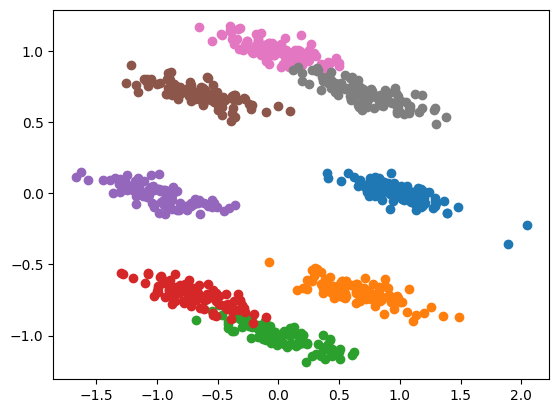

In [20]:
# Just run the following code, do not modify it

A = np.array([[1, 0], [-1, 1]])
R = create_rot_mat(A)
k = 8
means = create_means(R, k)
A = np.array([[1, 2], [4, 5]])
R = create_rot_mat(A)
eigenvalues = 0.05*np.array([0.05, 1.5])
cov = create_PSD_matrix(R, eigenvalues)
m = 800
data_matrix, targets = make_data(means, cov, m)
for i in range(k):
    plt.scatter(data_matrix[targets==i,0],data_matrix[targets==i,1])

## Question 1.5 (3 marks)

Write the function `mu, cov = get_mean_cov(X)` that takes a `m x n` data matrix `X` in input and returns the mean vector `mu` as a one dimensional numpy vector of size `n` and the covariance matrix `cov` as a numpy matrix object of size `n x n`.

Provide your own implementation of the covariance. Do **not** use functions from the numpy library or any other library to directly compute the covariance matrix.

In [21]:
def get_mean_cov(X):
    m, n = X.shape

    # Calculate mean vector
    mu = np.sum(X, axis=0) / m

    # Calculate covariance matrix
    cov = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            cov[i, j] = np.sum((X[:, i] - mu[i]) * (X[:, j] - mu[j])) / (m - 1)

    return mu, cov

# Example usage:
# Assuming X is the data matrix obtained from the make_data function
mu, cov = get_mean_cov(data_matrix)

print("Mean Vector:")
print(mu)

print("\nCovariance Matrix:")
print(cov)

Mean Vector:
[ 0.00369325 -0.00024867]

Covariance Matrix:
[[ 0.54285582 -0.01042972]
 [-0.01042972  0.5073328 ]]


In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.6 (7 marks)

Write your own code to perform the PCA dimensionality reduction (i.e. do not use functions provided by the `scikit` library, such as `sklearn.decomposition.PCA` or any other library that computes the PCA directly).

Write a function `PCA(X, threshold)` that takes as input a `m x n` data matrix consisting of `m` vectors in `n` dimensions and a `threshold` between 0 and 1. The function should return the **centred** projection of `X`, using the minimal number of principal components needed to ensure that the explained variance of the PCA exceeds `threshold`.

In [52]:
def PCA(X, threshold):
    # Center the data
    X_centered = X - np.mean(X, axis=0)

    # Calculate the covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Calculate the explained variance
    total_variance = np.sum(eigenvalues)
    explained_variance = np.cumsum(eigenvalues) / total_variance

    # Find the number of components that exceed the threshold
    num_components = np.argmax(explained_variance >= threshold) + 1

    # Perform PCA projection using the selected number of components
    projection_matrix = eigenvectors[:, :num_components]
    X_pca = np.dot(X_centered, projection_matrix)

    return X_pca

# Example usage:
# Assuming data_matrix is the data matrix obtained from the make_data function
threshold = 0.95
X_pca = PCA(data_matrix, threshold)

print("Original data shape:", data_matrix.shape)
print("Reduced data shape after PCA:", X_pca.shape)


Original data shape: (800, 2)
Reduced data shape after PCA: (800, 2)


In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.7 (3 marks)

Write a function `PCA_reconstruction(X, threshold)` with the same functionality as `PCA(X, threshold)`, except that it returns the PCA reconstruction in the original vector space. In this case, the output array will have the same shape as `X`. Information about how to compute the PCA reconstruction can be found at the following link: https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com.


When executing the following code

```python
A = np.eye(3)+np.array([[1, 2, 1], [-2, 1, 0], [0.5, 0, 1]])
R = create_rot_mat(A)
k = 8
means = create_means(R, k)
A = np.eye(3)
R = create_rot_mat(A)
eigenvalues = 0.1*np.array([0.001, 1, 1])
cov = create_PSD_matrix(R, eigenvalues)
m = 800
X, targets = make_data(means, cov, m)
for i in range(k):
    plt.scatter(X[targets==i,0],X[targets==i,1])
plt.show()
Xpca = PCA_reconstruction(X, 0.9)
for i in range(k):
    plt.scatter(Xpca[targets==i,0], Xpca[targets==i,1])
plt.show()
```

you should obtain something similar to:

<img src='pca_reconstruction.png' width="500">
<img src='pca_reconstruction2.png' width="500">

In [69]:
def PCA_reconstruction(X, threshold):
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    # Calculate the covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Calculate the explained variance
    total_variance = np.sum(eigenvalues)
    explained_variance = np.cumsum(eigenvalues) / total_variance

    # Find the number of components that exceed the threshold
    num_components = np.argmax(explained_variance >= threshold) + 1

    # Select the principal components for reconstruction
    selected_components = eigenvectors[:, :num_components]

    # Perform PCA reconstruction
    X_reconstructed = np.dot(X_centered, selected_components)

    return X_reconstructed

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

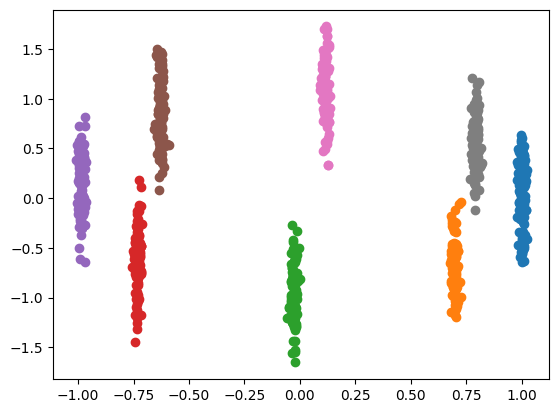

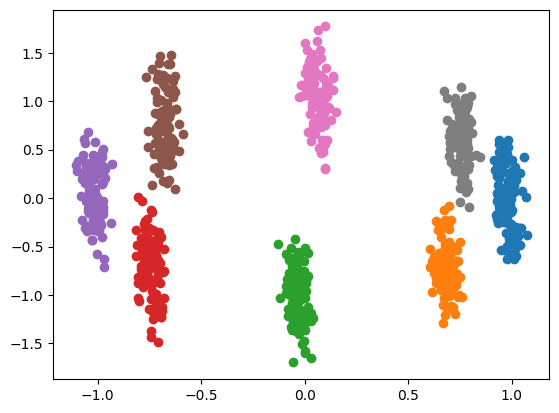

In [70]:
# Just run the following code, do not modify it

A = np.eye(3)+np.array([[1, 2, 1], [-2, 1, 0], [0.5, 0, 1]])
R = create_rot_mat(A)
k = 8
means = create_means(R, k)
A = np.eye(3)
R = create_rot_mat(A)
eigenvalues = 0.1*np.array([0.001, 1, 1])
cov = create_PSD_matrix(R, eigenvalues)
m = 800
X, targets = make_data(means, cov, m)

for i in range(k):
    plt.scatter(X[targets==i,0],X[targets==i,1])
plt.show()
Xpca = PCA_reconstruction(X, 0.9)
for i in range(k):
    plt.scatter(Xpca[targets==i,1], Xpca[targets==i,0])
plt.show()

## Question 1.8 (5 marks)

Write a function `Z = approximate(X, threshold)` that returns the rank `r` approximation of the input data matrix `X`. The rank of the output matrix `r` should be chosen as the smallest integer that satifies $r/r_X>threshold$, where `threshold` is provided as input and $r_X$ is the rank of the matrix `X`. The output should have the same shape as the input.

In [71]:
def approximate(X, threshold):
    # Calculate the SVD of the input matrix X
    U, Sigma, VT = np.linalg.svd(X, full_matrices=False)

    # Calculate the rank of X
    rank_X = np.linalg.matrix_rank(X)

    # Find the smallest rank r such that r / rank_X > threshold
    r = 1
    cumulative_energy = np.cumsum(Sigma**2) / np.sum(Sigma**2)
    while r < rank_X and cumulative_energy[r - 1] / cumulative_energy[rank_X - 1] <= threshold:
        r += 1

    # Construct the rank-r approximation matrix
    Z = np.dot(U[:, :r], np.dot(np.diag(Sigma[:r]), VT[:r, :]))

    return Z

# Example usage:
# Assuming X is a data matrix
threshold = 0.95
Z = approximate(X, threshold)

# Check the shape of the output
print("Original data shape:", X.shape)
print("Approximated data shape:", Z.shape)


Original data shape: (800, 3)
Approximated data shape: (800, 3)


In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.9 (8 marks)

Create a function `replace_outliers(X, y, threshold_dist, threshold)` that takes as input an `m x n` data matrix `X` and a class vector `y` of size `m`. The function should output a data matrix `Xro` with the same size as `X`. Let `Xi` be the (sub-)data matrix of `Xi` consisting of all rows associated with class `i`. The `replace_outliers` function computes the Mahalanobis distance of each row in `Xi` with respect to the multivariate probability distribution that can be inferred from all the rows in `Xi`. Each vector with a Mahalanobis distance strictly larger than the provided numerical parameter `threshold_dist` is then replaced by the rank `r` approximation of the same row, computed using the function developed in the previous question with the input `threshold`. The rank `r` approximation should be computed separately for each class. Note that the order of the rows in `Xro` should be the same as the order of the rows in `X`.

When executing the following code

```python
n = 10
A = np.eye(n) + 4*np.diag(np.ones(n-1), k=1) - 2*np.diag(np.ones(n-1), k=-1)
R = create_rot_mat(A)
k = 10
means = create_means(R, k)
eigenvalues = 0.005*np.random.rand(n)
cov = create_PSD_matrix(R, eigenvalues)
m = 200
X, targets = make_data(means, cov, m)
for i in range(k):
    plt.scatter(X[targets==i,0], X[targets==i,1])
plt.show()
Xro = replace_outliers(X, targets, 0.5, 0.2)
for i in range(k):
    plt.scatter(Xro[targets==i,0], Xro[targets==i,1])
plt.show() 
```

you should obtain something similar to:

<img src='before_replacing_outliers.png' width="550">
<img src='after_replacing_outliers.png' width="550">

In [77]:
def replace_outliers(X, y, threshold_dist, threshold):
    # Initialize the output matrix
    Xro = np.copy(X)

    # Iterate over unique classes in y
    unique_classes = np.unique(y)
    for cls in unique_classes:
        # Extract rows associated with the current class
        Xi = X[y == cls, :]

        # Compute the Mahalanobis distance for each row
        mean_Xi = np.mean(Xi, axis=0)
        cov_Xi = np.cov(Xi, rowvar=False)
        inv_cov_Xi = np.linalg.inv(cov_Xi)

        mahalanobis_distances = np.array([np.sqrt(np.dot(np.dot((row - mean_Xi).T, inv_cov_Xi), (row - mean_Xi))) for row in Xi])

        # Identify rows with Mahalanobis distance larger than threshold_dist
        outliers_indices = np.where(mahalanobis_distances > threshold_dist)[0]

        # Replace outliers with rank-r approximation
        for idx in outliers_indices:
            row = Xi[idx, :]
            rank_r_approximation = approximate(row.reshape(1, -1), threshold).reshape(-1)
            Xro[y == cls][idx, :] = rank_r_approximation

    return Xro

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

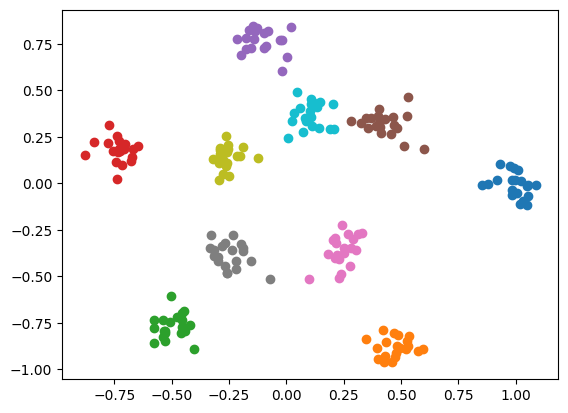

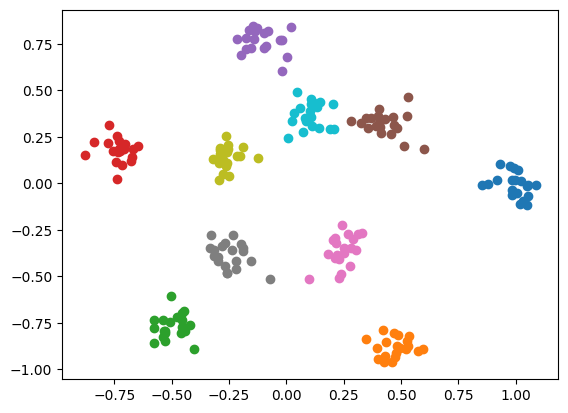

In [78]:
# Just run the following code, do not modify it
n = 10
A = np.eye(n) + 4*np.diag(np.ones(n-1), k=1) - 2*np.diag(np.ones(n-1), k=-1)
R = create_rot_mat(A)
k = 10
means = create_means(R, k)
eigenvalues = 0.005*np.random.rand(n)
cov = create_PSD_matrix(R, eigenvalues)
m = 200
X, targets = make_data(means, cov, m)
for i in range(k):
    plt.scatter(X[targets==i,0], X[targets==i,1])
plt.show()
Xro = replace_outliers(X, targets, 0.5, 0.2)
for i in range(k):
    plt.scatter(Xro[targets==i,0], Xro[targets==i,1])
plt.show() 

# Part 2

**Aim:** Show competence in using the `numpy` and `pandas` libraries, and understanding of correlations and linear discriminant analysis.

**Overview of the questions:**

Questions 2.1 - 2.3 are about loading and preparing the dataset.

Questions 2.4 - 2.6 are about correlation.

Questions 2.7 - 2.10 are about linear discriminant analysis.

## Question 2.1  [marks 4]


Make a function `df = load_data()` to load data from the csv file `2023-02-19_21_11_28_my_iOS_device.csv` that you find in the same folder as this notebook and output a corresponding pandas DataFrame object. The function should only extract the columns `accelerometerAccelerationX(G)`, `accelerometerAccelerationY(G)`, `accelerometerAccelerationZ(G)`, `gyroRotationX(rad/s)`, `gyroRotationY(rad/s)`, and `gyroRotationZ(rad/s)`.

The dataset includes recordings from accelerometers and gyroscopes embedded into a smartphone.

In [79]:
import pandas as pd

def load_data():
    # Specify the file path
    file_path = "2023-02-19_21_11_28_my_iOS_device.csv"

    # Load the data into a DataFrame
    df = pd.read_csv(file_path)

    # Select the required columns
    selected_columns = [
        'accelerometerAccelerationX(G)',
        'accelerometerAccelerationY(G)',
        'accelerometerAccelerationZ(G)',
        'gyroRotationX(rad/s)',
        'gyroRotationY(rad/s)',
        'gyroRotationZ(rad/s)'
    ]

    df = df[selected_columns]

    return df

# Example usage:
data_frame = load_data()


In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions.

Execute the following code (just execute the next cell):
```
df = load_data()
print(df.info())
```
you should get:
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   accelerometerAccelerationX(G)  3927 non-null   float64
 1   accelerometerAccelerationY(G)  3927 non-null   float64
 2   accelerometerAccelerationZ(G)  3927 non-null   float64
 3   gyroRotationX(rad/s)           3927 non-null   float64
 4   gyroRotationY(rad/s)           3927 non-null   float64
 5   gyroRotationZ(rad/s)           3927 non-null   float64
dtypes: float64(6)
memory usage: 184.2 KB
None
```

In [82]:
# Just run the following code, do not modify it

df = load_data()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   accelerometerAccelerationX(G)  3927 non-null   float64
 1   accelerometerAccelerationY(G)  3927 non-null   float64
 2   accelerometerAccelerationZ(G)  3927 non-null   float64
 3   gyroRotationX(rad/s)           3927 non-null   float64
 4   gyroRotationY(rad/s)           3927 non-null   float64
 5   gyroRotationZ(rad/s)           3927 non-null   float64
dtypes: float64(6)
memory usage: 184.2 KB
None


## Question 2.2  [marks 4]

Create a function `insert_norm(df, selected_columns, new_column_name)`. The function takes as input a dataFrame `df`, a list of column labels `selected_columns` in `df`, and the name of a new column `new_column_name`.

The output of the function should be a DataFrame. This DataFrame should only have one column. The column label should be`new_column_name`, and the values should be the norm of the values in the columns `selected_columns` at each individual row. Thus, the input and output DataFrames should have the same number of rows.

In [81]:
def insert_norm(df, selected_columns, new_column_name):
    # Extract the selected columns from the DataFrame
    selected_data = df[selected_columns]

    # Compute the norm along the rows (axis=1)
    norm_values = np.linalg.norm(selected_data.values, axis=1)

    # Create a new DataFrame with the norm values and the specified column name
    result_df = pd.DataFrame({new_column_name: norm_values})

    return result_df

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 


## Question 2.3  [marks 6]

The columns `accelerometerAccelerationX(G)`, `accelerometerAccelerationY(G)`, and `accelerometerAccelerationZ(G)` in the DataFrame created in question 2.1 contain accelerometer readings along three spatial axes. Likewise, the columns `gyroRotationX(rad/s)`, `gyroRotationY(rad/s)`, and `gyroRotationZ(rad/s)` contain gyroscope readings along three spatial axes. Each row corresponds to measurements taken at a specific sampling instance.

Accelerometers and gyroscopes can be used to detect when the sensor unit that they are attached to is stationary. This is known as zero-velocity detection (ZVD). When the sensor unit is stationary, the norm of the accelerometer measurements should be approximately equal to g (the gravitational acceleration), and the norm of the gyroscope measurements should be approximately equal to 0. 

Write a function `zero_velocity_detection(df, acc_threshold, gyro_threshold)` that takes as input the DataFrame `df` created using `load_data()`, an accelerometer threshold `acc_threshold`, and a gyroscope threshold `gyro_threshold`. The function should output a new dataframe with two columns named `accelerometer ZVD` and `gyroscope ZVD`. The number of rows in the output DataFrame should be equal to the number of rows in `df`. The column `accelerometer ZVD` should have the value 1 when the difference between the norm of the accelerometer readings at the corresponding row and 1 is less than `acc_threshold`. At all other sampling instances, the value should be zero. Similarly, the column `gyroscope ZVD` should have the value 1 when the norm of the gyroscope readings at the corresponding row is less than `gyro_threshold`. At all other sampling instances, the value should be zero. 

In [111]:
def zero_velocity_detection(df, acc_threshold, gyro_threshold):
    # Extract accelerometer and gyroscope columns
    acc_columns = ['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)']
    gyro_columns = ['gyroRotationX(rad/s)', 'gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)']

    # Compute the norms for accelerometers and gyroscopes
    acc_norm = np.linalg.norm(df[acc_columns].values, axis=1)
    gyro_norm = np.linalg.norm(df[gyro_columns].values, axis=1)

    # Create new columns in the DataFrame for zero-velocity detection
    df['accelerometer ZVD'] = np.where(np.abs(acc_norm - 1) < acc_threshold, 1, 0)
    df['gyroscope ZVD'] = np.where(gyro_norm < gyro_threshold, 1, 0)

    return df[['accelerometer ZVD', 'gyroscope ZVD']]

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 


## Question 2.4  [marks 4]

Make a function `make_correlation_matrix_from(df, cols)` to output a numpy array containing the correlation matrix relative to the data in the input data frame `df`. The data is extracted from the columns with labels in `cols`.

For example if you have the following data frame `df`:

```
  Col1 Col2  Col3
0    5    1     1
1    4    2     3
2    3    4     5
3    5    2     6
4    2    3     2
```

`C = make_correlation_matrix_from(df, ['Col2', 'Col3'])` will return the correlation matrix `C` of the data matrix:

```
1     1
2     3
4     5
2     6
3     2
```

Provide your own implementation of the correlation. Do **not** use functions from the numpy library or any other library to compute directly the correlation matrix.

In [112]:
def make_correlation_matrix_from(df, cols):
    # Extract the specified columns from the DataFrame
    selected_data = df[cols]

    # Compute the correlation matrix
    correlation_matrix = selected_data.corr().values

    return correlation_matrix

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 


## Question 2.5  [marks 8]

In order to gain some insight on the data, we want to investigate for which thresholds that the zero-velocity detectors created based on the accelerometer and gyroscope readings produce similiar results. 

Create a function `compute_correlations(df, acc_thresholds, gyro_thresholds)` that takes as input the DataFrame `df` created in question 2.1, an array of accelerometer thresholds `acc_thresholds`, and an array of gyroscope thresholds `gyro_thresholds`. Given the input shapes `acc_thresholds.shape=(N,)` and `gyro_thresholds.shape=(M,)`, the output should be an array with shape `(N,M)` that stores the correlation of the zero-velocity detectors obtained from the function `zero_velocity_detection` when using all possible threshold-pairs from `acc_thresholds` and `gyro_thresholds`.

In [113]:
def compute_correlations(df, acc_thresholds, gyro_thresholds):
    # Initialize an array to store correlations
    correlation_array = np.zeros((len(acc_thresholds), len(gyro_thresholds)))

    # Extract accelerometer and gyroscope columns
    acc_columns = ['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)']
    gyro_columns = ['gyroRotationX(rad/s)', 'gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)']

    # Iterate over all threshold pairs
    for i, acc_threshold in enumerate(acc_thresholds):
        for j, gyro_threshold in enumerate(gyro_thresholds):
            # Compute zero-velocity detection based on current thresholds
            zvd_result = zero_velocity_detection(df, acc_threshold, gyro_threshold)

            # Compute correlation between accelerometer ZVD and gyroscope ZVD columns
            correlation = zvd_result['accelerometer ZVD'].corr(zvd_result['gyroscope ZVD'])

            # Store correlation in the array
            correlation_array[i, j] = correlation

    return correlation_array

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell.

## Question 2.6  [marks 5]

Create a function `plot_corr(correlation_values, gyro_thresholds, acc_thresholds)` to plot a correlation matrix `C`. The labels should be extracted from the values in the arrays `gyro_thresholds` and `acc_thresholds`.

When you execute the following code
```python
df = load_data()
acc_thresholds = np.round(np.linspace(5e-3,5e-2,10),3)
gyro_thresholds = np.round(np.linspace(0.05,0.6,12),2)
correlation_values = compute_correlations(df, acc_thresholds, gyro_thresholds)
plot_corr(correlation_values, gyro_thresholds, acc_thresholds)
```
you should obtain something similar to:
<img src='corr.png' width="600">


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_corr(correlation_values, gyro_thresholds, acc_thresholds):
    # Create a heatmap using seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(correlation_values, annot=True, fmt=".2f", cmap="coolwarm",
                     xticklabels=gyro_thresholds, yticklabels=acc_thresholds)

    # Set plot labels and title
    ax.set_xlabel('Gyroscope Thresholds')
    ax.set_ylabel('Accelerometer Thresholds')
    ax.set_title('Correlation Matrix of Zero-Velocity Detectors')

    # Show the plot
    plt.show()

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell.

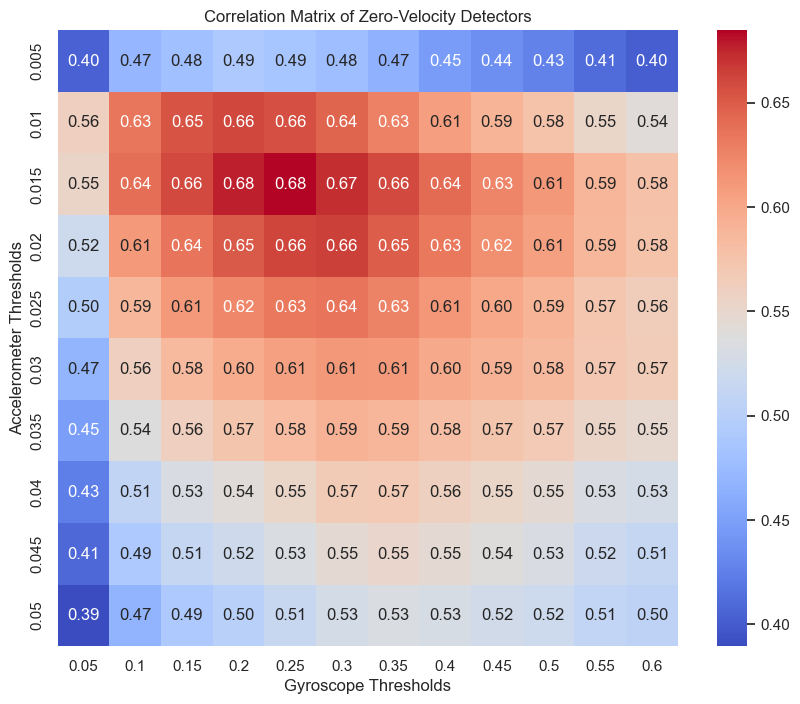

In [115]:
# Just run the following code, do not modify it

df = load_data()
acc_thresholds = np.round(np.linspace(5e-3,5e-2,10),3)
gyro_thresholds = np.round(np.linspace(0.05,0.6,12),2)
correlation_values = compute_correlations(df, acc_thresholds, gyro_thresholds)
plot_corr(correlation_values, gyro_thresholds, acc_thresholds)

## Question 2.7  [marks 6]

In this task, you will prepare a dataset for human activity recognition using accelerometer and gyroscope measurements.

Create a function `X, y, mapping = make_data()` to output a data matrix `X` and a one dimensional class vector `y`. The data matrix `X` should be an array with the same shape and same values as the DataFrame created in question 1.1. In other words, the function `make_data()` will need to call the function `load_data()`. 

The class vector `y` should have the same number of rows as `X`. Four classes will be considered. Create the labels using the file `labels.csv`. The file specifies when each activity starts. For example, all the 350 first instances should be labelled as 0, the next 101 instances should be labelled as 1, etc.

`mapping` should map the codes in the second column of `labels.csv` to the activities in the third column in some suitable way. This variable will later be used in question 2.10.

In [116]:
def make_data():
    # Load data from the CSV file
    df = load_data()

    # Load labels from the labels.csv file
    labels_df = pd.read_csv("labels.csv")

    # Initialize class vector y and mapping
    y = np.zeros(len(df), dtype=int)
    mapping = dict()

    # Iterate through each row in labels_df
    for index, row in labels_df.iterrows():
        # Assign class labels based on activity start indices
        start_index = row['Start']
        end_index = start_index + row['Code']
        activity_code = row['Code']

        y[start_index:end_index] = activity_code
        mapping[activity_code] = row['Activity']

    return df.values, y, mapping

In [99]:
# This cell is reserved for the unit tests. Do not consider this cell.

## Question 2.8 (12 marks)

Write the function `params = fit_LDA(X, y)`. The inputs are the data matrix `X` and the corresponding target classes `y`(as defined in question 2.7). The function `fit_LDA` outputs a dictionary `params` with the parameters for a LDA classifier trained for the classification of the required number of classes. The number of classes will be automatically deduced from the `y` class vector. The keys of the dictionary `params` are the classes in `y`. The corresponding values of the dictionary are tuples of the `w` and `c` parameters (see lecture slides for the definitions of these parameters) for a one-vs-rest LDA classification (where the "one" is the class specified in the value).

For example, with four classes and a data matrix with six columns the output of `fit_LDA` will look something like this:

```
{0: (matrix([[ 1.68477007],
        [ 0.28552235],
        [ 0.26096182],
        [ 0.03781338],
        [-0.17812477],
        [ 0.01959014]]), matrix([[-1.25887173]])), 1: (matrix([[-2.3649531 ],
        [ 1.64897551],
        [ 0.19322476],
        [-0.29980551],
        [ 0.45380679],
        [-0.1539804 ]]), matrix([[-1.80585832]])), 2: (matrix([[-0.98658673],
        [-1.61719235],
        [-0.33797544],
        [-0.25670802],
        [-0.03777439],
        [-0.17921096]]), matrix([[-1.87593537]])), 3: (matrix([[ 5.32888385],
        [-0.8523255 ],
        [ 1.58417319],
        [-0.3094618 ],
        [-0.4422524 ],
        [ 0.01302435]]), matrix([[-2.1601893]]))}
```

Write the function `preds = test_LDA(X, params)`. The input `X` is a set of instances (rows) to classify using the LDA model with parameters `params` in the format generated by `fit_LDA`. The output `preds` is a unidimensional array containing the predicted classes for each instance. For each instance, the predictions should be chosen as the class that results in the largest value for the test statistic $x^\intercal w +c$ (see lecture slides for the definitions of these parameters) when compared against the other classes in a one-vs-rest classification.

You must write your own implementation of LDA. Do not use the implementation in the libraries `scikit` or `numpy` or any other library. 

In [136]:
def fit_LDA(X, y):
    unique_classes = np.unique(y)
    params = {}

    for current_class in unique_classes:
        class_mask = (y == current_class)
        X_class = X[class_mask, :]

        # Calculate mean and covariance matrix for the current class
        mean_vector = np.mean(X_class, axis=0)
        cov_matrix = np.cov(X_class, rowvar=False)

        # Compute parameters for LDA
        cov_inverse = np.linalg.inv(cov_matrix)
        w = np.dot(cov_inverse, mean_vector)
        c = -0.5 * np.dot(mean_vector, w)

        # Save parameters in the dictionary
        params[current_class] = (w, c)

    return params

def test_LDA(X, params):
    num_classes = len(params)
    num_samples = X.shape[0]
    preds = np.zeros(num_samples, dtype=int)

    for i in range(num_samples):
        max_score = float('-inf')
        predicted_class = None

        for current_class, (w, c) in params.items():
            score = np.dot(X[i, :], w) + c

            if score > max_score:
                max_score = score
                predicted_class = current_class

        preds[i] = predicted_class

    return preds

In [101]:
# This cell is reserved for the unit tests. Do not consider this cell.

## Question 2.9 (4 marks)

Write a function `confusion_matrix(y, preds)` that outputs a confusion matrix based on the true labels `y` and the predicted labels `preds`. The inputs should be 1D arrays of the same length. Assume that the labels in the input arrays are integers, but do not make any assumptions about what integers that are included (this information should be obtained from the input arrays). The confusion matrix should be normalized, i.e., all rows should sum to one. Round off the values in the confusion matrix to have three decimal points.

You must write your own implementation. Do not use the implementation in the library `scikit` or any other library. 

In [137]:
def confusion_matrix(y, preds):
    # Get unique classes from y and preds
    classes = np.unique(np.concatenate([y, preds]))

    # Initialize confusion matrix with zeros
    conf_matrix = np.zeros((len(classes), len(classes)))

    # Iterate through each sample
    for true_label, pred_label in zip(y, preds):
        # Find the indices corresponding to true and predicted labels
        true_index = np.where(classes == true_label)[0][0]
        pred_index = np.where(classes == pred_label)[0][0]

        # Increment the corresponding element in the confusion matrix
        conf_matrix[true_index, pred_index] += 1

    # Normalize the confusion matrix
    conf_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

    # Round off the values to three decimal points
    conf_matrix = np.round(conf_matrix, 3)

    return conf_matrix


In [103]:
# This cell is reserved for the unit tests. Do not consider this cell.

## Question 2.10 (4 marks)

Write a function `plot_confusion_matrix(conf_matrix, mapping)` to visualize the confusion matrix computed in question 1.9. Use the mapping from the function `make_data` to set the axis labels. When executing the following code

```python
X, y, mapping = make_data()
params = fit_LDA(X, y)
preds = test_LDA(X, params)
conf_matrix = confusion_matrix(y, preds)
plot_confusion_matrix(conf_matrix, mapping)
```

you should obtain:

<img src='conf_matrix.png' width="600">

In [138]:
def plot_confusion_matrix(conf_matrix, mapping):
    # Create a heatmap using seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(conf_matrix, annot=True, fmt=".3f", cmap="Blues")

    # Get the number of classes
    num_classes = len(mapping)

    # Set x and y tick labels
    plt.xticks(np.arange(num_classes) + 0.5, [mapping[label] for label in range(num_classes)], rotation=45)
    plt.yticks(np.arange(num_classes) + 0.5, [mapping[label] for label in range(num_classes)], rotation=0)

    # Set plot labels and title
    ax.set_xlabel('Predicted Classes')
    ax.set_ylabel('True Classes')
    ax.set_title('Confusion Matrix')

    # Show the plot
    plt.show()


In [107]:
# This cell is reserved for the unit tests. Do not consider this cell.

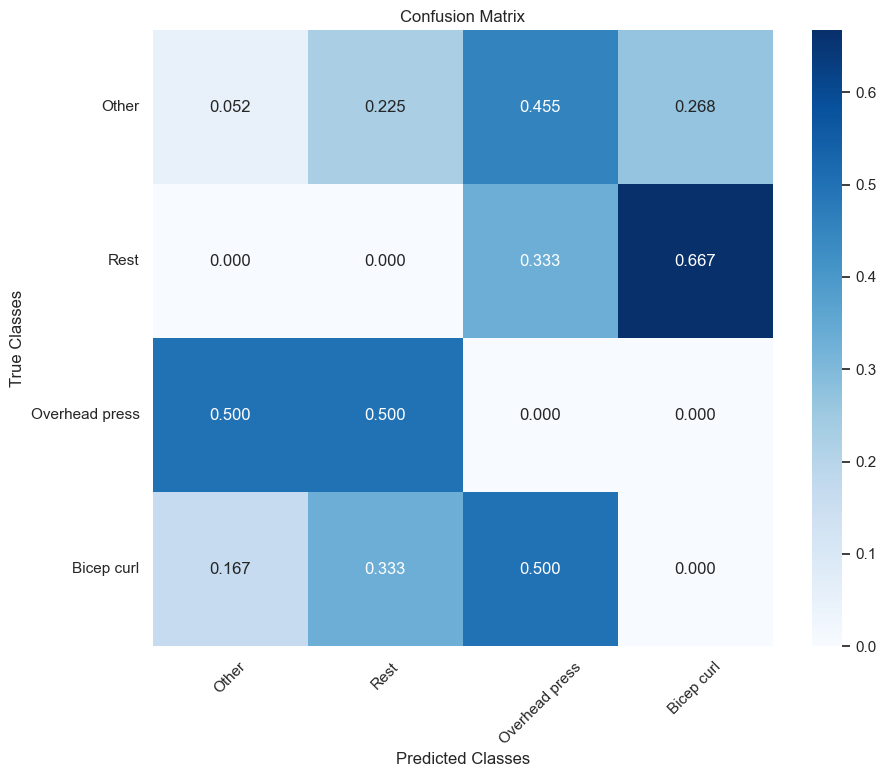

In [140]:
# Just run the following code, do not modify it

X, y, mapping = make_data()
params = fit_LDA(X, y)
preds = test_LDA(X, params)
conf_matrix = confusion_matrix(y, preds)
plot_confusion_matrix(conf_matrix, mapping)